# Desafio del curso de R (Coursera)

Como parte del equipo de ciencia de datos de Gourmet Analytics, utilizas análisis computacional de datos para asesorar a las empresas de la industria alimentaria. Limpias, organizas y visualizas datos para llegar a conclusiones que beneficiarán a tus clientes. Como miembro de un equipo colaborativo, compartir tu análisis con otros es una parte importante de tu trabajo. 

Tu cliente actual es Chocolate and Tea, una nueva cadena de cafeterías. 

El establecimiento combina un menú extenso de tés finos y barras de chocolate de todo el mundo. Su diversa selección incluye chocolate con leche y plátano, chocolate blanco con mandarina, y chocolate amargo con pistacho e higo. La larguísima lista de barras de chocolate es la base del encanto de la marca Chocolate and Tea. Las ventas de barras de chocolate son el principal motor de ingresos. 

Chocolate and Tea busca ofrecer barras de chocolate que estén bien calificadas por los críticos profesionales. También cambia el menú continuamente para asegurarse de que refleje la diversidad mundial de la producción de chocolate. El equipo de gestión actualiza con regularidad la lista de barras de chocolate para que esté alineada con las últimas calificaciones y para asegurar que la lista contenga barras de distintos países. 

Te pidieron que recopiles y analices los datos de las últimas calificaciones de chocolate. En particular, les gustaría saber qué países producen las barras de chocolate muy amargo (con un gran porcentaje de cacao) que tienen la mejor calificación. Esos datos ayudarán a crear el próximo menú de barras de chocolate. 

## Scenario 1

Utilizas la función read_csv() para importar los datos desde el archivo .csv.


In [213]:
library(tidyverse)
library(dplyr)
install.packages("janitor")
library("janitor")
library(ggplot2)


The downloaded binary packages are in
	/var/folders/q0/vn00vg8x2ys_c1dprf61pr480000gn/T//RtmpGXjtgJ/downloaded_packages


In [215]:
chocolate_df <-read_csv("flavors_of_cacao.csv")
# or using read.csv() fixes the \n problem

Rows: 1795 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Company 
(Maker-if known), Specific Bean Origin
or Bar Name, Cocoa
...
dbl (3): REF, Review
Date, Rating

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Ahora que creaste un marco de datos, quieres saber más sobre cómo se organizan los datos. El marco de datos tiene cientos de filas y muchas columnas. 

In [217]:
colnames(chocolate_df)
head(chocolate_df)
glimpse(chocolate_df)

[1] "Company \n(Maker-if known)"        "Specific Bean Origin\nor Bar Name"
[3] "REF"                               "Review\nDate"                     
[5] "Cocoa\nPercent"                    "Company\nLocation"                
[7] "Rating"                            "Bean\nType"                       
[9] "Broad Bean\nOrigin"

Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela


Rows: 1,795
Columns: 9
$ `Company \n(Maker-if known)`        <chr> "A. Morin", "A. Morin", "A. Morin"…
$ `Specific Bean Origin\nor Bar Name` <chr> "Agua Grande", "Kpime", "Atsane", …
$ REF                                 <dbl> 1876, 1676, 1676, 1680, 1704, 1315…
$ `Review\nDate`                      <dbl> 2016, 2015, 2015, 2015, 2015, 2014…
$ `Cocoa\nPercent`                    <chr> "63%", "70%", "70%", "70%", "70%",…
$ `Company\nLocation`                 <chr> "France", "France", "France", "Fra…
$ Rating                              <dbl> 3.75, 2.75, 3.00, 3.50, 3.50, 2.75…
$ `Bean\nType`                        <chr> " ", " ", " ", " ", " ", "Criollo"…
$ `Broad Bean\nOrigin`                <chr> "Sao Tome", "Togo", "Togo", "Togo"…


A continuación, comienzas a limpiar los datos. Cuando observas los encabezados de las columnas de tu marco de datos, notas que la primera columna se denomina Company...Maker.if.known. (Nota: El punto que aparece luego de known es parte del nombre de la variable). Para ser claro y consistente, decides cambiar el nombre de esta columna por el de Maker (sin el punto al final).

In [219]:
chocolate_df <- clean_names(chocolate_df)
chocolate_df <- rename(chocolate_df, Maker = company_maker_if_known)

In [221]:
colnames(chocolate_df)
head(chocolate_df)
glimpse(chocolate_df)

[1] "Maker"                            "specific_bean_origin_or_bar_name"
[3] "ref"                              "review_date"                     
[5] "cocoa_percent"                    "company_location"                
[7] "rating"                           "bean_type"                       
[9] "broad_bean_origin"

Maker,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela


Rows: 1,795
Columns: 9
$ Maker                            <chr> "A. Morin", "A. Morin", "A. Morin", "…
$ specific_bean_origin_or_bar_name <chr> "Agua Grande", "Kpime", "Atsane", "Ak…
$ ref                              <dbl> 1876, 1676, 1676, 1680, 1704, 1315, 1…
$ review_date                      <dbl> 2016, 2015, 2015, 2015, 2015, 2014, 2…
$ cocoa_percent                    <chr> "63%", "70%", "70%", "70%", "70%", "7…
$ company_location                 <chr> "France", "France", "France", "France…
$ rating                           <dbl> 3.75, 2.75, 3.00, 3.50, 3.50, 2.75, 3…
$ bean_type                        <chr> " ", " ", " ", " ", " ", "Criollo", "…
$ broad_bean_origin                <chr> "Sao Tome", "Togo", "Togo", "Togo", "…


Luego de previsualizar y limpiar tus datos, determinas qué variables son más relevantes para tu análisis. Puedes enfocarte en Rating, Cocoa.Percent, y Company.Location. Decides utilizar la función select() para crear un nuevo marco de datos con estas tres variables solamente.

In [223]:
trimmed_flavors_df <-chocolate_df %>% 
select(rating, cocoa_percent, company_location)
head(trimmed_flavors_df)

rating,cocoa_percent,company_location
<dbl>,<chr>,<chr>
3.75,63%,France
2.75,70%,France
3.00,70%,France
3.50,70%,France
3.50,70%,France
2.75,70%,France


Luego, seleccionas las estadísticas básicas que pueden ayudar a tu equipo a comprender mejor el sistema de calificaciones en los datos.
Utilizarás las funciones summarize() y max() para encontrar la calificación máxima para los datos.

In [225]:
trimmed_flavors_df %>% summarize(max(rating))

max(rating)
<dbl>
5


Luego de completar tu análisis sobre el sistema de calificación, determinas que cualquier calificación superior o igual a 3.9 puntos puede considerarse una calificación alta. También sabes que Chocolate and Tea considera que una barra de chocolate es muy amarga si tiene un porcentaje de cacao superior o igual al 75%. Decides crear un nuevo marco de datos para averiguar qué barras de chocolate cumplen con esas dos condiciones

In [278]:
best_trimmed_flavors_df <- trimmed_flavors_df %>%
    filter(cocoa_percent >= 75, rating >= 3.75) 
head(best_trimmed_flavors_df)

rating,cocoa_percent,company_location
<dbl>,<chr>,<chr>
3.75,75%,Switzerland
4.00,75%,Italy
3.75,75%,Brazil
3.75,77%,U.S.A.
4.00,75%,France
3.75,75%,France


Ahora que ya limpiaste y organizaste tus datos, estás listo para crear algunas visualizaciones de datos útiles. Tu equipo te asigna la tarea de crear una serie de visualizaciones en base a las solicitudes del equipo de gestión de Chocolate and Tea. Decides utilizar ggplot2 para crear tus elementos visuales. Quieres utilizar la función geom_bar() para crear un gráfico de barras. Crea un gráfico de barras con la variable Rating en el eje X.

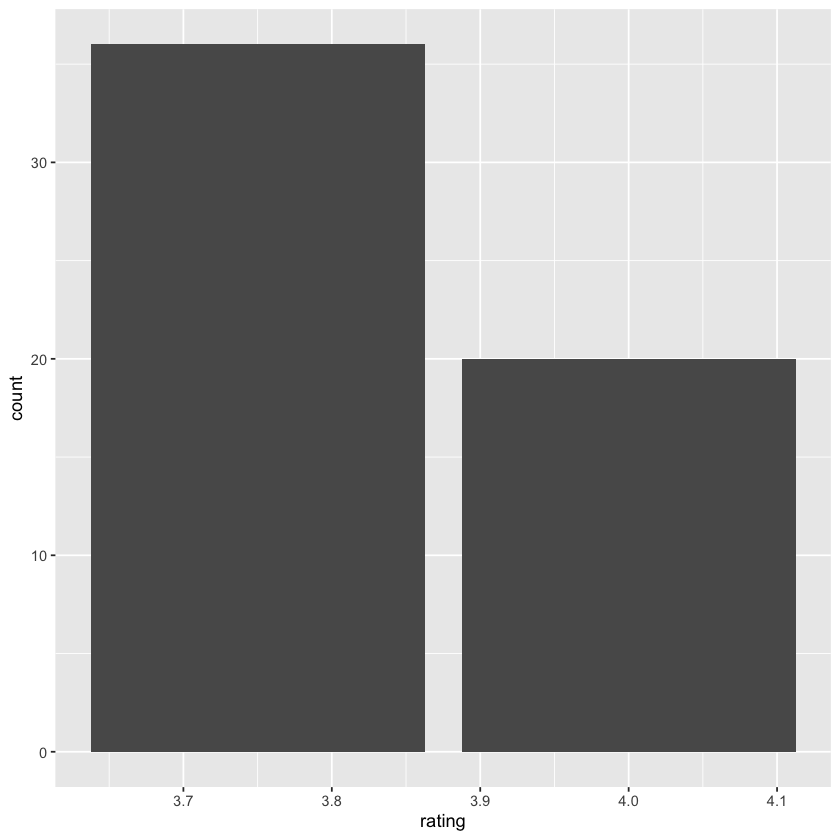

In [280]:
ggplot(data = best_trimmed_flavors_df) + 
    geom_bar(mapping = aes(x = rating))


El gráfico de barras muestras las ubicaciones donde se producen las barras de chocolate mejor calificadas. Para comprender mejor la calificación específica de cada ubicación, te gustaría resaltar cada barra.


Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


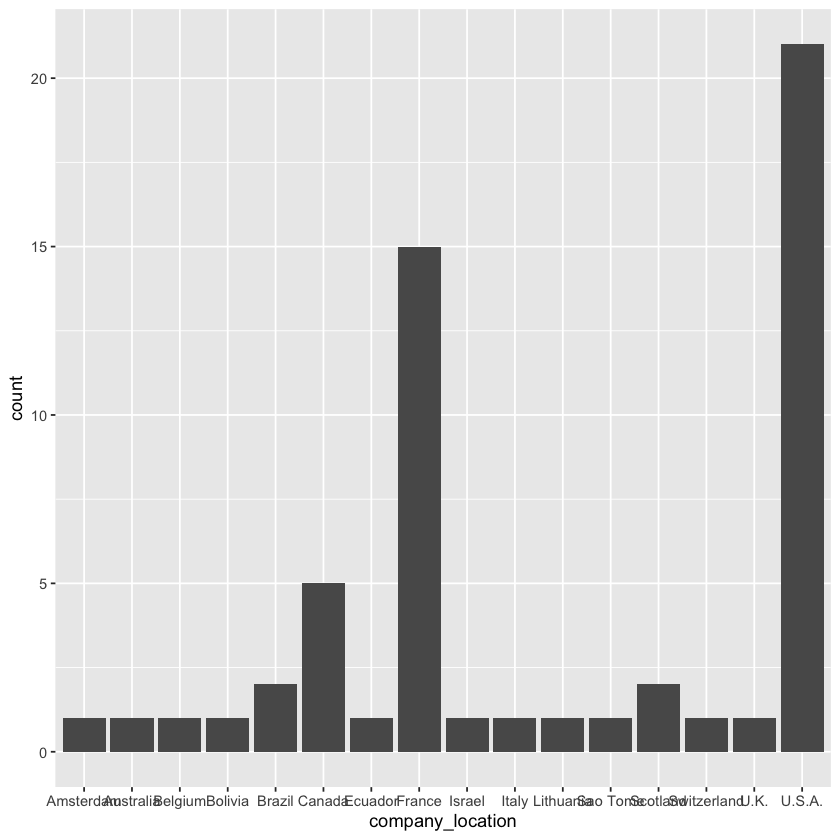

In [282]:
ggplot(data = best_trimmed_flavors_df) + 
    geom_bar(mapping = aes(x = company_location, fill = rating))

Un compañero de equipo crea un nuevo diagrama en base a los datos de las barras de chocolate. Tu compañero de equipo te pide que hagas unas revisiones sobre su código. 

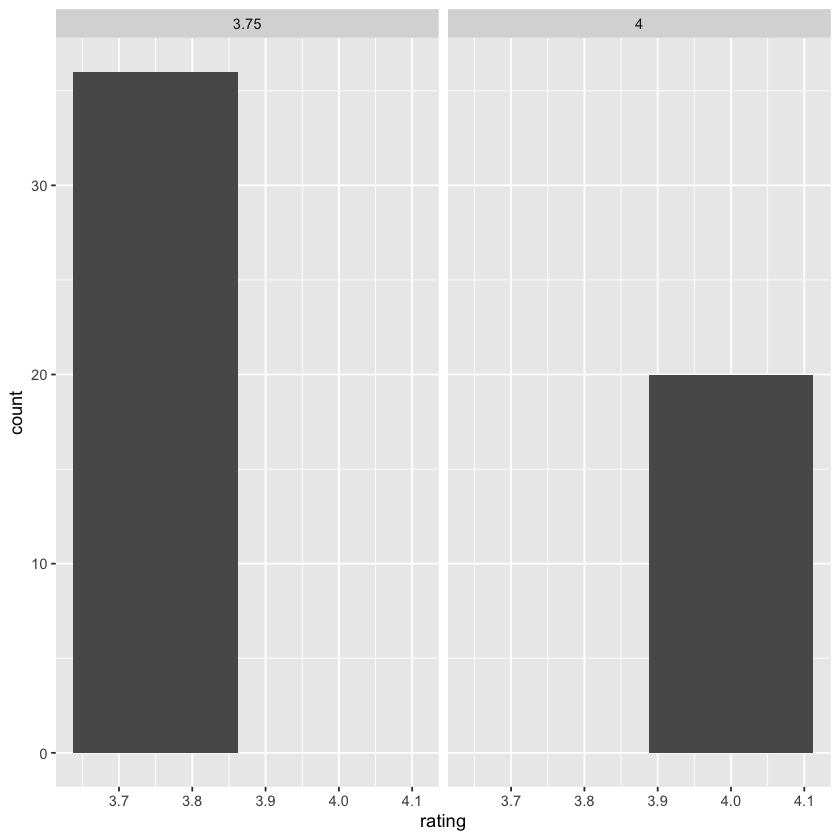

In [284]:
ggplot(data = best_trimmed_flavors_df) +
    geom_bar(mapping = aes(x = rating)) +
    facet_wrap(~rating)

un equipo ha creado unas visualizaciones básicas para explorar diferentes aspectos de los datos de la barra de chocolate. Te has ofrecido para agregar títulos a los diagramas. Comienzas con el diagrama de dispersión. 

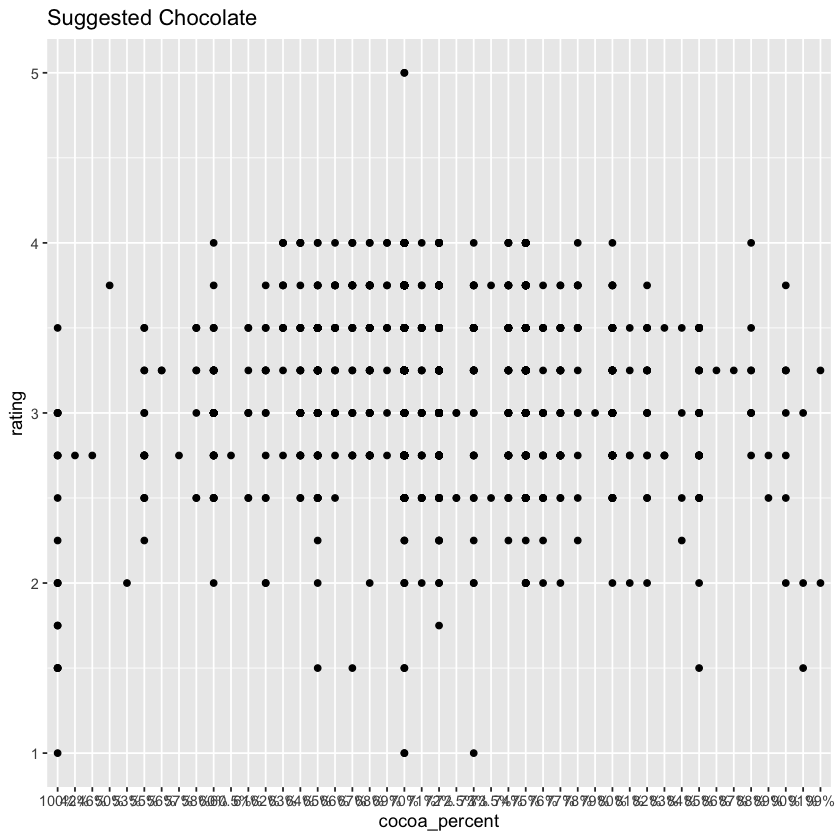

In [286]:
ggplot(data = trimmed_flavors_df) +
    geom_point(mapping = aes(x = cocoa_percent, y = rating)) +
    labs(title = 'Suggested Chocolate')